In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_dcm = pd.read_csv('dicom_meta.csv') 

In [13]:
df_dcm

,PatientID,StudyDate,Modality,FilePath,StudyYear
0,TCGA-60-2696,1998-05-25,CT,manifest-1745037983505/TCGA-LUSC/TCGA-60-2696/...,1998
1,TCGA-60-2696,1998-05-25,CT,manifest-1745037983505/TCGA-LUSC/TCGA-60-2696/...,1998
2,TCGA-60-2696,1998-05-25,CT,manifest-1745037983505/TCGA-LUSC/TCGA-60-2696/...,1998
3,TCGA-60-2696,1998-05-25,CT,manifest-1745037983505/TCGA-LUSC/TCGA-60-2696/...,1998
4,TCGA-60-2696,1998-05-25,CT,manifest-1745037983505/TCGA-LUSC/TCGA-60-2696/...,1998
...,...,...,...,...,...
30301,TCGA-K4-A4AC,2006-07-22,CT,manifest-1745037983505/TCGA-BLCA/TCGA-K4-A4AC/...,2006
30302,TCGA-K4-A4AC,2006-07-22,CT,manifest-1745037983505/TCGA-BLCA/TCGA-K4-A4AC/...,2006
30303,TCGA-K4-A4AC,2006-07-22,CT,manifest-1745037983505/TCGA-BLCA/TCGA-K4-A4AC/...,2006
30304,TCGA-K4-A4AC,2006-07-22,CT,manifest-1745037983505/TCGA-BLCA/TCGA-K4-A4AC/...,2006


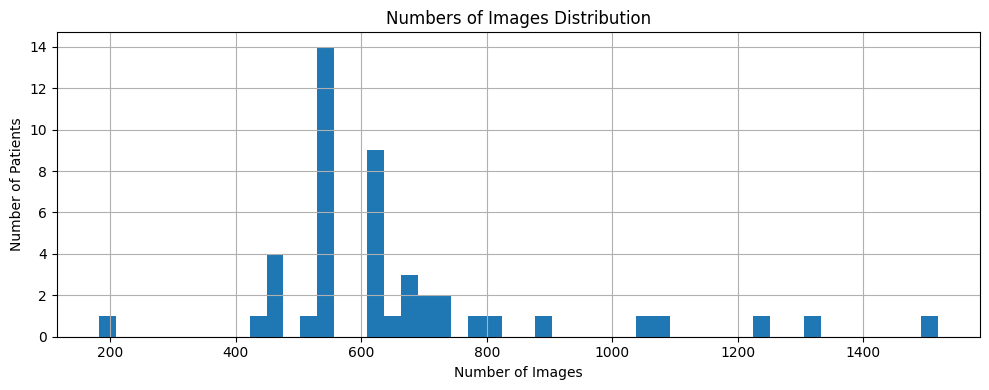

In [9]:
patient_counts = df_dcm['PatientID'].value_counts()

plt.figure(figsize=(10, 4))
patient_counts.hist(bins=50)
plt.title('Numbers of Images Distribution')
plt.xlabel('Number of Images')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

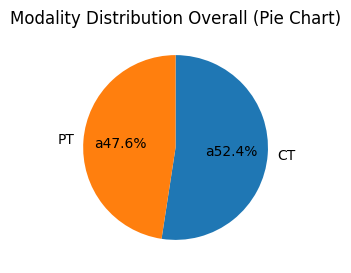

In [15]:
modality_counts = df_dcm['Modality'].value_counts()

modality_counts.plot(
    kind='pie', 
    autopct='a%1.1f%%',    
    startangle=90,       
    counterclock=False,   
    figsize=(3, 3),       
    ylabel=''             
)
plt.title('Modality Distribution Overall (Pie Chart)')
plt.show()

In [22]:
print("=== CT/PT Ratio for each candidate ===")
modality_counts_per_patient = df_dcm.groupby(['PatientID', 'Modality']).size().unstack(fill_value=0)
modality_counts_per_patient['CT_to_PT_ratio'] = modality_counts_per_patient['CT'] / modality_counts_per_patient['PT'].replace(0, pd.NA)

def compare_ct_pt(row):
    if row['CT'] > row['PT']:
        return 'Greater'
    elif row['CT'] < row['PT']:
        return 'Less'
    else:
        return 'Equal'

modality_counts_per_patient['CT_vs_PT'] = modality_counts_per_patient.apply(compare_ct_pt, axis=1)

modality_counts_per_patient


=== CT/PT Ratio for each candidate ===


Modality,CT,PT,CT_to_PT_ratio,CT_vs_PT
PatientID,,,,
A056396,390,299,1.304348,Greater
A113004,376,251,1.498008,Greater
A389295,390,299,1.304348,Greater
A636688,435,290,1.500000,Greater
ACRIN-NSCLC-FDG-PET-001,663,662,1.001511,Greater
ACRIN-NSCLC-FDG-PET-002,712,526,1.353612,Greater
ACRIN-NSCLC-FDG-PET-004,404,404,1.000000,Equal
ACRIN-NSCLC-FDG-PET-005,760,759,1.001318,Greater
ACRIN-NSCLC-FDG-PET-006,444,444,1.000000,Equal


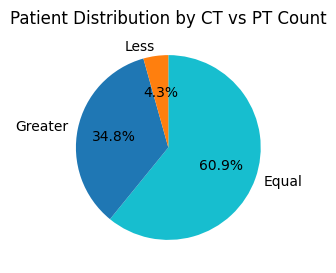

In [42]:
ct_vs_pt_counts = modality_counts_per_patient['CT_vs_PT'].value_counts()

ct_vs_pt_labels = ['Equal', 'Greater', 'Less']
ct_vs_pt_colors = ['tab:cyan', 'tab:blue', 'tab:orange']

ct_vs_pt_counts.plot(
    kind='pie',
    autopct='%1.1f%%',     
    startangle=90,        
    counterclock=False,   
    figsize=(3, 3),
    ylabel='',
    colors=ct_vs_pt_colors           
)

plt.title('Patient Distribution by CT vs PT Count')
plt.show()

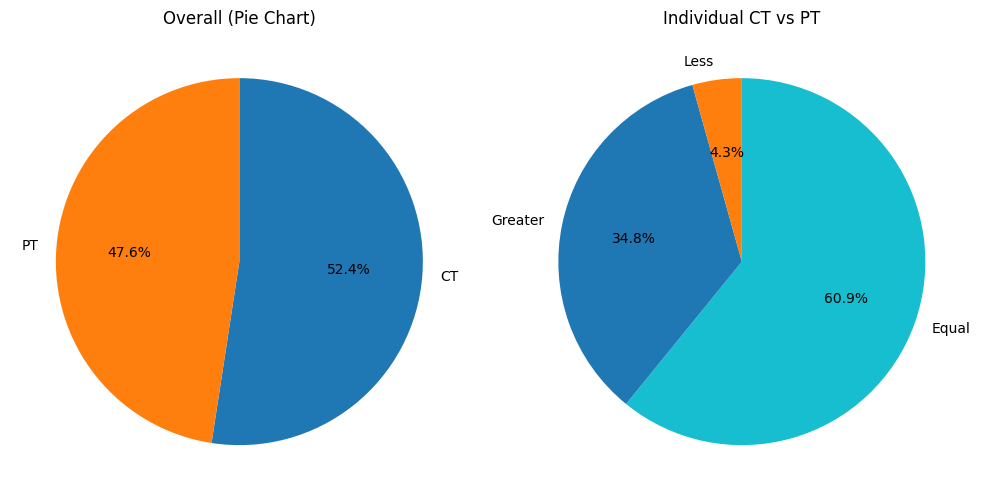

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 一行两列

ct_vs_pt_labels = ['Equal', 'Greater', 'Less']
ct_vs_pt_colors = ['tab:cyan', 'tab:blue', 'tab:orange']

modality_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    ax=axes[0],
    ylabel=''
)
axes[0].set_title('Overall (Pie Chart)')

ct_vs_pt_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    ax=axes[1],
    ylabel='',
    colors=ct_vs_pt_colors
)
axes[1].set_title('Individual CT vs PT')

plt.tight_layout()
plt.show()

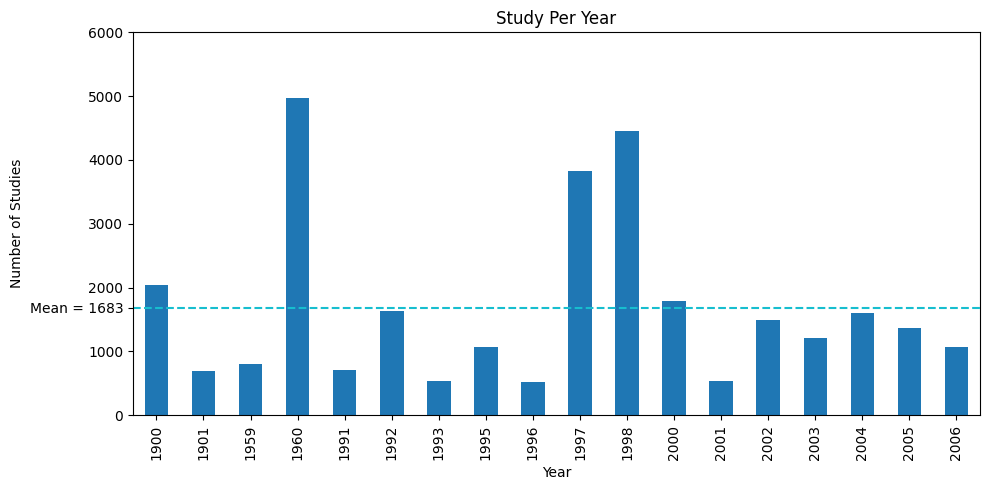

In [61]:
df_dcm['StudyDate'] = pd.to_datetime(df_dcm['StudyDate'], format='%Y%m%d')
df_dcm['StudyYear'] = df_dcm['StudyDate'].dt.year

study_counts_per_year = df_dcm['StudyYear'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10, 5))
study_counts_per_year.plot(kind='bar', ax=ax, color='tab:blue')

mean_value = study_counts_per_year.mean()
ax.axhline(mean_value, color='tab:cyan', linestyle='--', linewidth=1.5, label=f'Mean = {mean_value:.0f}')

yticks = ax.get_yticks().tolist()
yticks.append(mean_value)
ax.set_yticks(sorted(yticks))
ax.set_yticklabels(
    [f'Mean = {int(mean_value)}' if abs(y - mean_value) < 1 else f'{int(y)}' for y in sorted(yticks)]
)

ax.set_title('Study Per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Studies')
plt.tight_layout()
plt.show()

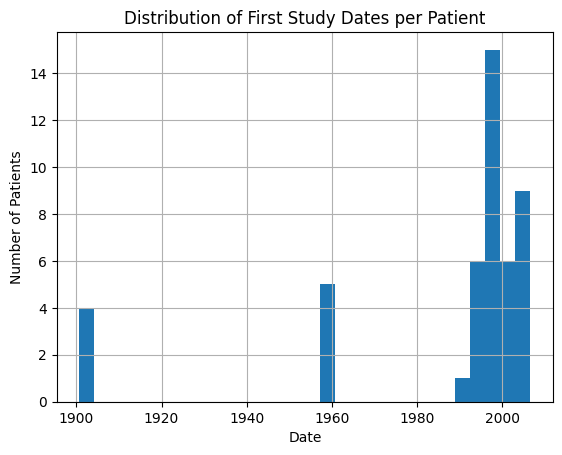

In [14]:
first_scan = df_dcm.groupby('PatientID')['StudyDate'].min()
first_scan.hist(bins=30)
plt.title('Distribution of First Study Dates per Patient')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.show()